<a href="https://colab.research.google.com/github/Al-Tayeb96/Chicago-Crime-Data/blob/main/Chicago_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import holidays
import datetime as dt
from holidays import country_holidays

In [2]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import glob
folder = '/content/drive/MyDrive/ CodingDojo/DATA VISUALIZATION/week1/Data/'
crime_files = sorted(glob.glob(folder+"*.csv"))



In [5]:
df = pd.concat([pd.read_csv(f,low_memory=False) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [7]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

df['Datetime'] = pd.to_datetime(df['Date'], format=date_format)
chicago_full = df.sort_values('Datetime')
chicago_full

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00
31,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00
32,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00
33,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,2022-12-31 12:50:00
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,2022-12-31 12:50:00
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,2022-12-31 12:52:00
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657,2022-12-31 12:52:00


In [8]:
all_days = pd.date_range(df["Date"].min(), df["Date"].max())


In [9]:
us_holidays = country_holidays('US')
holiday_list = [us_holidays.get(day) for day in all_days]
chicago_full["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
chicago_full.head()



,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime,US Holiday
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00,New Year's Day
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00,New Year's Day
31,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00,New Year's Day
32,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00,New Year's Day
33,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00,New Year's Day


In [10]:
chicago_full['Is_Holiday'] = chicago_full['US Holiday'].notna()
chicago_full.head()


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime,US Holiday,Is_Holiday
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00,New Year's Day,True
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00,New Year's Day,True
31,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00,New Year's Day,True
32,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00,New Year's Day,True
33,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00,New Year's Day,True


In [11]:
#The original individual crime data with a datetime index. (Each row is 1 crime)
chicago_final_1=chicago_full.set_index('Datetime')
chicago_final_1

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday,Is_Holiday
Datetime,,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,New Year's Day,True
2001-01-01 01:00:00,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,New Year's Day,True
2001-01-01 01:00:00,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,New Year's Day,True
2001-01-01 01:00:00,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,New Year's Day,True
2001-01-01 01:00:00,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,New Year's Day,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,None,False
2022-12-31 12:50:00,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,None,False
2022-12-31 12:52:00,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,None,False


In [12]:
day_count=chicago_final_1.resample('D').sum()
day_count

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Is_Holiday
Datetime,,,,,,,,,
2001-01-01,4011740634,400,378,2267987,21147.0,8194.0,72641.077994,-152199.715024,1825
2001-01-02,1545846568,383,187,1404493,12797.0,147.0,47664.670569,-99856.853277,0
2001-01-03,1542074517,343,197,1462886,13359.0,132.0,48045.805839,-100651.350927,0
2001-01-04,1555657957,377,179,1397040,12994.0,0.0,48785.523718,-102222.916683,0
2001-01-05,1701884634,415,200,1530155,14044.0,156.0,52769.463977,-110554.590960,0
...,...,...,...,...,...,...,...,...,...
2022-12-27,7543189950,70,96,694723,6812.0,14192.0,21427.078656,-44887.568351,0
2022-12-28,7983384637,63,112,697152,6830.0,14030.0,22592.581721,-47339.899182,0
2022-12-29,8358666625,66,107,718511,7037.0,14292.0,23639.979313,-49528.016672,0


In [13]:
chicago_final_1.groupby("Description").size().index


Index(['$300 AND UNDER', '$500 AND UNDER', 'ABUSE / NEGLECT - CARE FACILITY',
       'ABUSE/NEGLECT: CARE FACILITY', 'ADULTRY',
       'AGG CRIM SEX ABUSE FAM MEMBER', 'AGG CRIMINAL SEXUAL ABUSE',
       'AGG PO HANDS ETC SERIOUS INJ', 'AGG PO HANDS NO/MIN INJURY',
       'AGG PRO EMP HANDS SERIOUS INJ',
       ...
       'VIOLATION OF STALKING NO CONTACT ORDER',
       'VIOLATION OF SUMMARY CLOSURE',
       'VIOLENT OFFENDER - ANNUAL REGISTRATION',
       'VIOLENT OFFENDER - DUTY TO REGISTER',
       'VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS',
       'VIOLENT OFFENDER: ANNUAL REGISTRATION',
       'VIOLENT OFFENDER: DUTY TO REGISTER',
       'VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS', 'WIREROOM/HORSES',
       'WIREROOM/SPORTS'],
      dtype='object', name='Description', length=547)

Topic 1) Comparing Police Districts

- Which district had the most crimes in 2022?
- Which had the least?

In [14]:
district_22=chicago_final_1.loc['2022':'2023',['District','Description']]
district_22


,District,Description
Datetime,,
2022-01-01 01:00:00,6.0,AUTOMOBILE
2022-01-01 01:00:00,14.0,AGGRAVATED - HANDGUN
2022-01-01 01:00:00,24.0,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...
2022-01-01 01:00:00,18.0,FROM BUILDING
2022-01-01 01:00:00,10.0,AGGRAVATED - OTHER DANGEROUS WEAPON
...,...,...
2022-12-31 12:50:00,10.0,SIMPLE
2022-12-31 12:50:00,7.0,AGGRAVATED - HANDGUN
2022-12-31 12:52:00,11.0,SIMPLE


In [15]:
district_22.groupby("District").size().sort_values(ascending=False).idxmax()


8.0

In [16]:
district_22.groupby("District").size().sort_values(ascending=False).idxmin()

31.0

Topic 2) Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [17]:
total_crimes=chicago_final_1['Description'].resample('Y').size()
total_crimes.head()


Datetime
2001-12-31    485886
2002-12-31    486807
2003-12-31    475985
2004-12-31    469422
2005-12-31    453773
Freq: A-DEC, Name: Description, dtype: int64

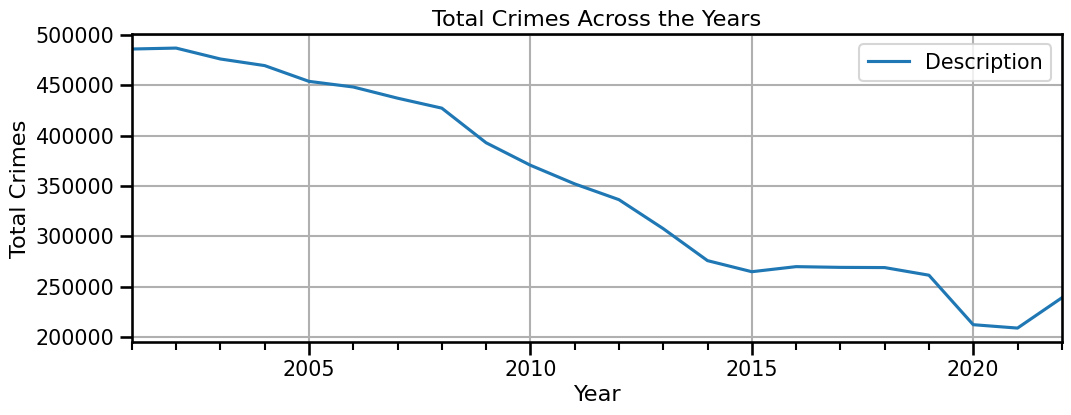

In [18]:

total_crimes.plot(title='Total Crimes Across the Years',xlabel='Year',ylabel='Total Crimes').grid()
plt.legend()

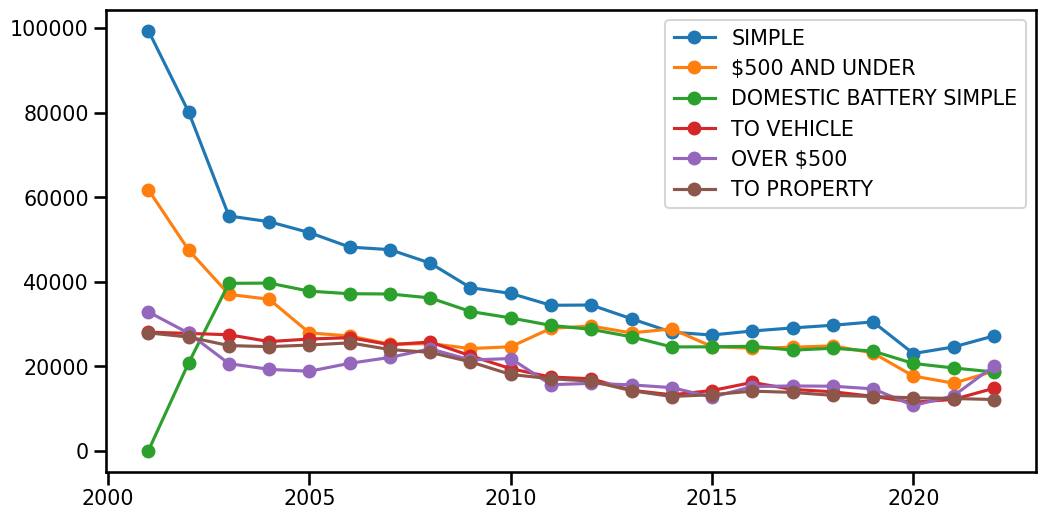

In [19]:
individual_crimes=chicago_final_1.groupby("Description").size().sort_values(ascending=False).index[0:6]
plt.figure(figsize=(12, 6))
for crime in individual_crimes:
    crime_counts = chicago_final_1[chicago_final_1['Description'] == crime].resample('Y').size()
    plt.plot(crime_counts.index.year, crime_counts.values, marker='o', linestyle='-', label=crime)
    plt.legend()



#forcasting

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00


In [22]:
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

In [23]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [24]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)

    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()

    return fig

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [26]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax

In [57]:
chicago_df=chicago_final_1.groupby('Primary Type').resample('M').size()
chicago_df

Primary Type       Datetime  
ARSON              2001-01-31     67
                   2001-02-28     57
                   2001-03-31     93
                   2001-04-30     89
                   2001-05-31     94
                                ... 
WEAPONS VIOLATION  2022-08-31    832
                   2022-09-30    780
                   2022-10-31    735
                   2022-11-30    597
                   2022-12-31    543
Length: 8602, dtype: int64

In [28]:
unstacked = chicago_df.unstack(level=0)
unstacked

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6527.0,1934.0,NaN,162.0,3966.0,3.0,1192.0,1398.0,...,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7867.0,337.0
2001-02-28,57.0,2029.0,6042.0,1666.0,NaN,134.0,3665.0,1.0,1063.0,1163.0,...,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,NaN,149.0,4617.0,4.0,1141.0,1313.0,...,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7766.0,345.0
2001-04-30,89.0,2746.0,8328.0,1932.0,NaN,132.0,4922.0,2.0,1133.0,1199.0,...,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8887.0,1997.0,1.0,155.0,4757.0,2.0,1067.0,1261.0,...,2528.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,40.0,1984.0,3740.0,674.0,15.0,NaN,2713.0,145.0,392.0,1432.0,...,1214.0,23.0,1.0,56.0,NaN,749.0,127.0,48.0,5244.0,832.0
2022-09-30,49.0,1891.0,3723.0,653.0,13.0,NaN,2619.0,144.0,378.0,1540.0,...,1147.0,59.0,1.0,66.0,NaN,868.0,116.0,33.0,5117.0,780.0
2022-10-31,41.0,1839.0,3501.0,688.0,10.0,NaN,2834.0,162.0,374.0,1568.0,...,1166.0,26.0,1.0,72.0,NaN,945.0,91.0,46.0,5242.0,735.0


In [29]:
chicago_ts=unstacked.loc['2001':,['ASSAULT','THEFT']].copy()
chicago_ts

Primary Type,ASSAULT,THEFT
Datetime,,
2001-01-31,2123.0,7867.0
2001-02-28,2029.0,6669.0
2001-03-31,2824.0,7766.0
2001-04-30,2746.0,7702.0
2001-05-31,2903.0,8420.0
...,...,...
2022-08-31,1984.0,5244.0
2022-09-30,1891.0,5117.0
2022-10-31,1839.0,5242.0


In [30]:
ASSAULT_ts=chicago_ts['ASSAULT']

In [31]:
ASSAULT_ts.isna().sum()

0

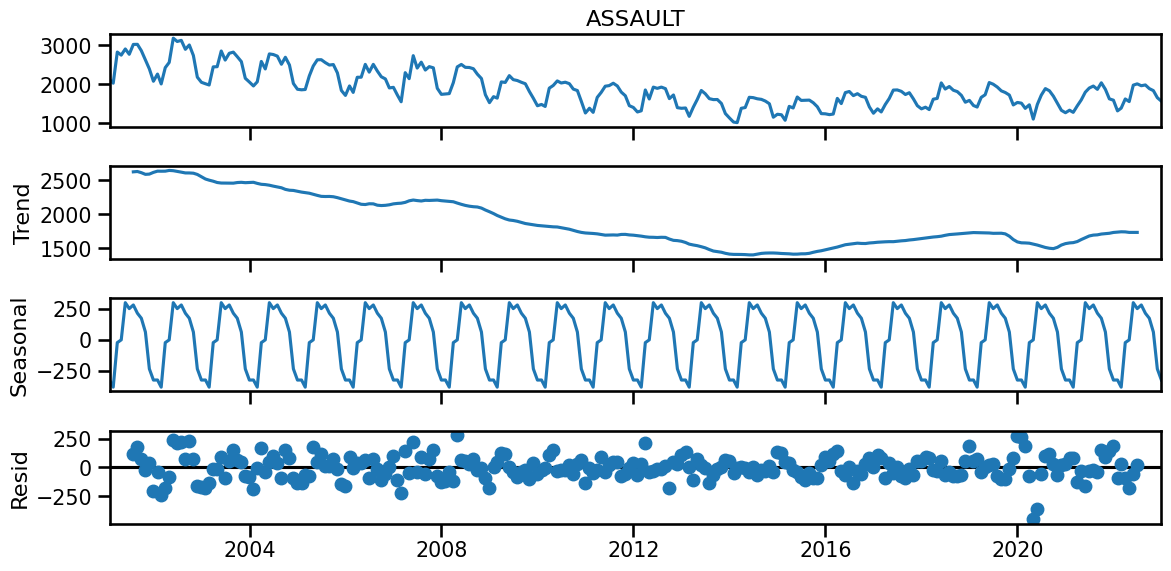

In [32]:
# We see a repeating pattern that is likely seasonal
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ASSAULT_ts)
fig = decomp.plot()
fig.set_size_inches(12,6)
fig.tight_layout()

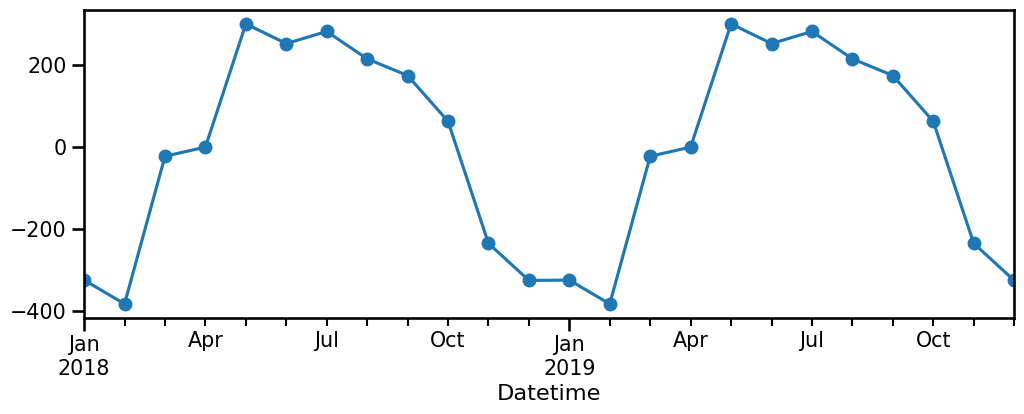

In [64]:
seasonal = decomp.seasonal
ax = seasonal.loc['2018': '2019'].plot(marker = 'o')

In [35]:
get_adfuller_results(ASSAULT_ts)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.836624,15,248,0.362437,0.05,False


In [36]:
ndiffs(ASSAULT_ts)

1

In [37]:
nsdiffs(ASSAULT_ts, m = 12)


0

In [38]:
ASSAULT_ts_diff = ASSAULT_ts.diff().dropna()

In [39]:
get_adfuller_results(ASSAULT_ts_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-3.936162,14,248,0.001784,0.05,True


<Axes: xlabel='Datetime'>

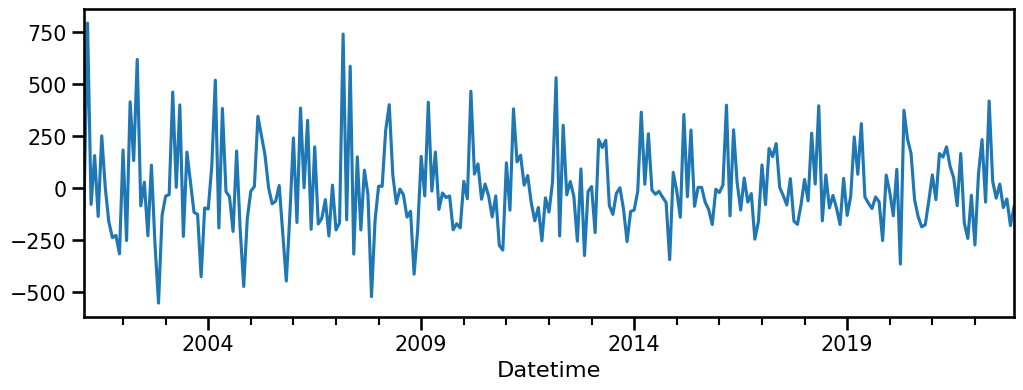

In [40]:
ASSAULT_ts_diff.plot()

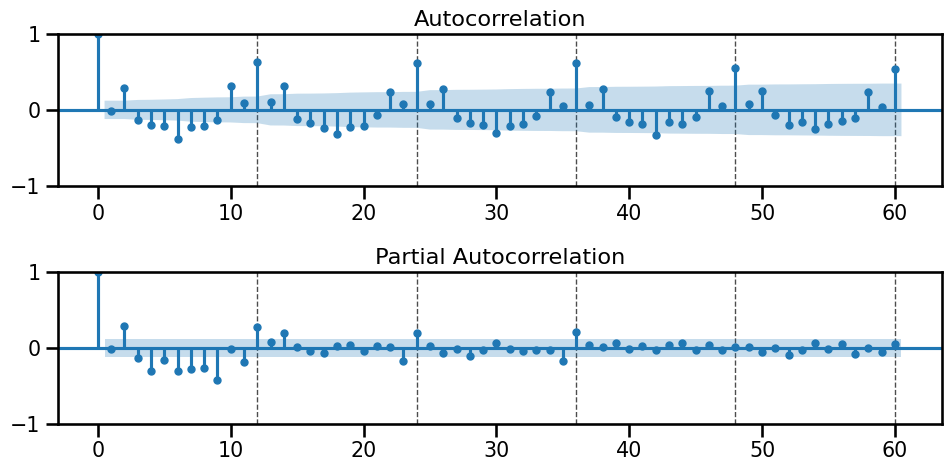

In [104]:
plot_acf_pacf(ASSAULT_ts_diff, annotate_seas=True, m = 12,nlags=60);


p=1,d=1,q=1
P=0,D=0,Q=1

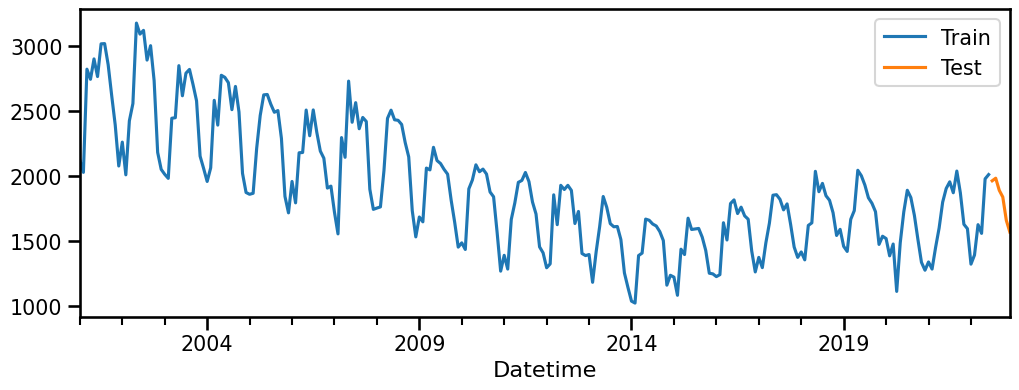

In [105]:
# tts so test size is 24 lags
test_lags =6
train, test = train_test_split(ASSAULT_ts, test_size= test_lags)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [106]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima_train = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [107]:
# Obtain summary
sarima_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                          ASSAULT   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1609.608
Date:                          Mon, 11 Dec 2023   AIC                           3229.215
Time:                                  13:19:57   BIC                           3246.961
Sample:                              01-31-2001   HQIC                          3236.352
                                   - 06-30-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9153      0.035     26.160      0.000       0.847       0.984
ma.L1         -0.9994      0.181     -5.512      0.000      -1.355      -0.644
ar.S.L12       0.9940      0.004    246.420      0.000       0.986       1.002
ma.S.L12      -0.7972      0.063    -12.621      0.000      -0.921      -0.673
sigma2       1.47e+04   3448.804      4.263      0.000    7941.304    2.15e+04
===================================================================================
Ljung-Box (L1) (Q):                  19.32   Jarque-Bera (JB):                14.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

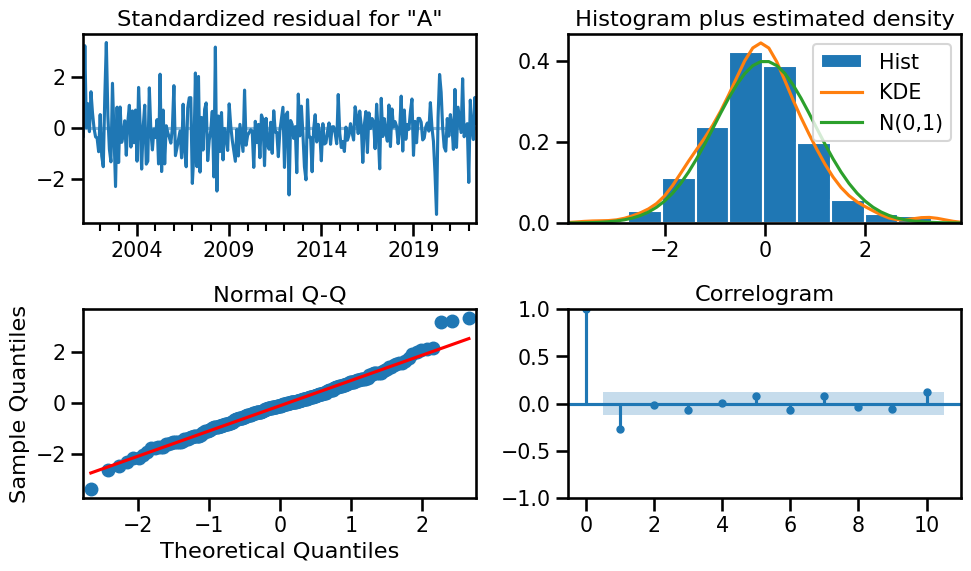

In [108]:
# Obtain diagnostic plots
fig = sarima_train.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 48.796
- MSE = 2,790.463
- RMSE = 52.825
- R^2 = 0.882
- MAPE = 2.74%


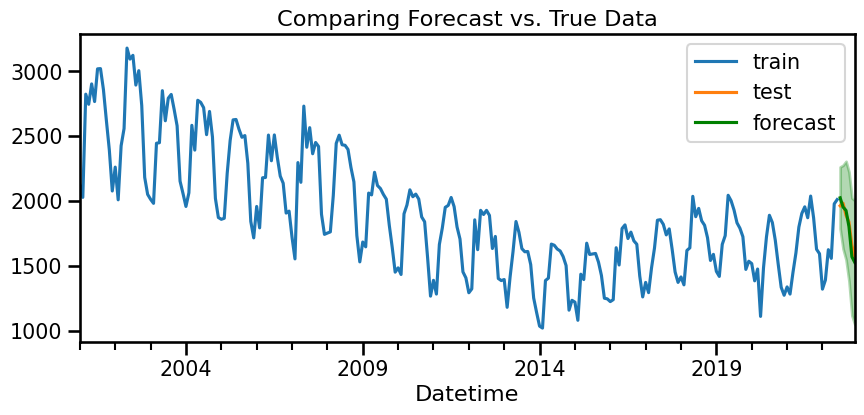

In [109]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima_train.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Datetime'>)

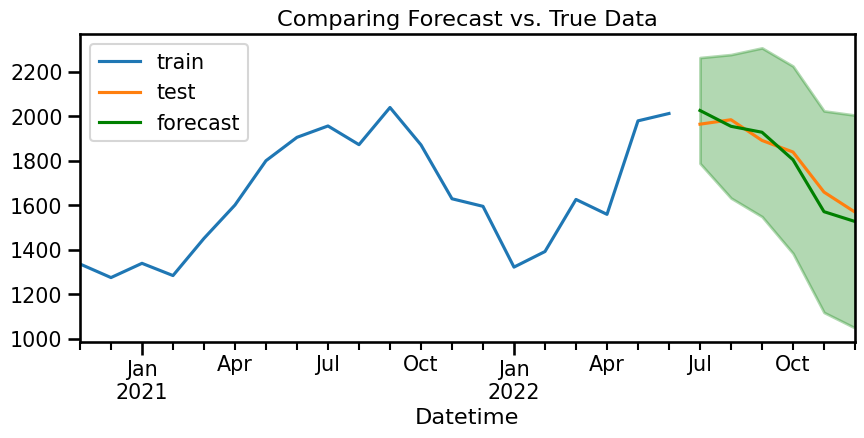

In [110]:
# Obtain summary of forecast as dataframe
forecast_df = sarima_train.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df, n_train_lags = 20)

In [111]:
import pmdarima as pm
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3483.860, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3318.021, Time=1.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3405.065, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3481.861, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3485.758, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3404.125, Time=0.47 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.18 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3337.645, Time=0.28 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=3313.233, Time=0.91 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=3462.086, Time=0.32 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=3

In [112]:
# Try auto_arima orders
sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Obtain summary
sarima.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                               ASSAULT   No. Observations:                  258
Model:             ARIMA(4, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1592.457
Date:                               Mon, 11 Dec 2023   AIC                           3202.914
Time:                                       13:25:59   BIC                           3234.856
Sample:                                   01-31-2001   HQIC                          3215.759
                                        - 06-30-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4188      0.061     -6.910      0.000      -0.538      -0.300
ar.L2         -0.2510      0.065     -3.838      0.000      -0.379      -0.123
ar.L3         -0.2446      0.063     -3.882      0.000      -0.368      -0.121
ar.L4         -0.1559      0.062     -2.495      0.013      -0.278      -0.033
ar.S.L12       1.9979      0.009    219.791      0.000       1.980       2.016
ar.S.L24      -0.9989      0.009   -113.522      0.000      -1.016      -0.982
ma.S.L12      -1.9596      0.083    -23.510      0.000      -2.123      -1.796
ma.S.L24       0.9639      0.087     11.024      0.000       0.792       1.135
sigma2      1.081e+04   1.58e-05   6.83e+08      0.000    1.08e+04    1.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.32
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.12
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+23. Standard errors may be unstable.
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 44.893
- MSE = 2,540.407
- RMSE = 50.402
- R^2 = 0.893
- MAPE = 2.49%


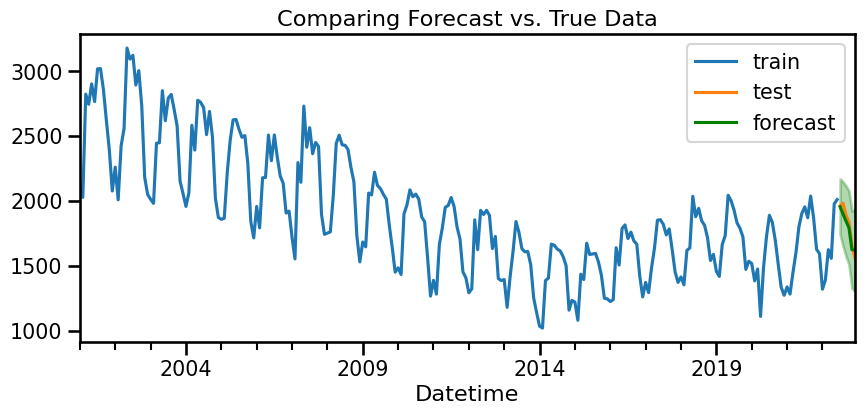

In [113]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Datetime'>)

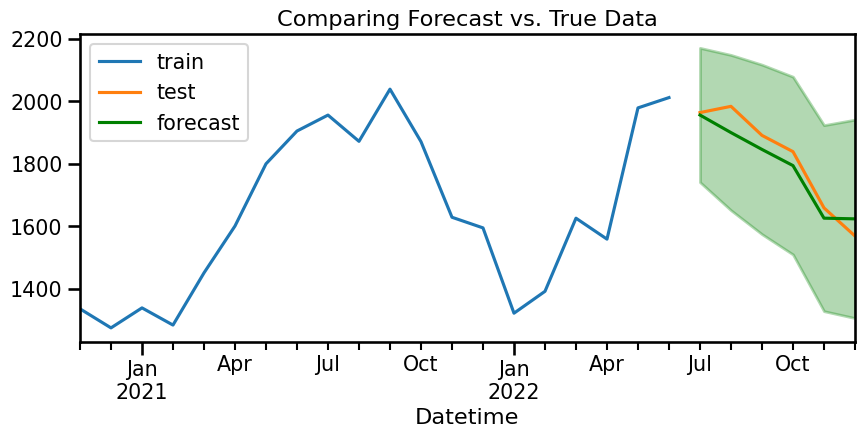

In [114]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df, n_train_lags = 20)

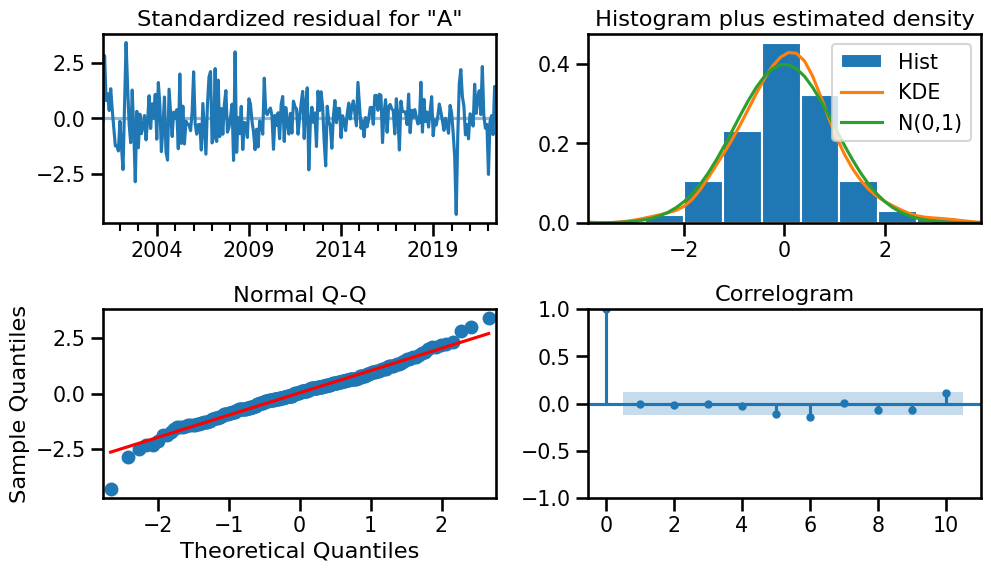

In [116]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [117]:
final_p = 4
final_q = 0
final_d = 1
final_P = 2
final_Q = 2
final_D = 0
m=12
final_model= tsa.ARIMA(
    ASSAULT_ts,
    order=(final_p, final_d, final_q),
    seasonal_order=(final_P, final_D, final_Q, m),
).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


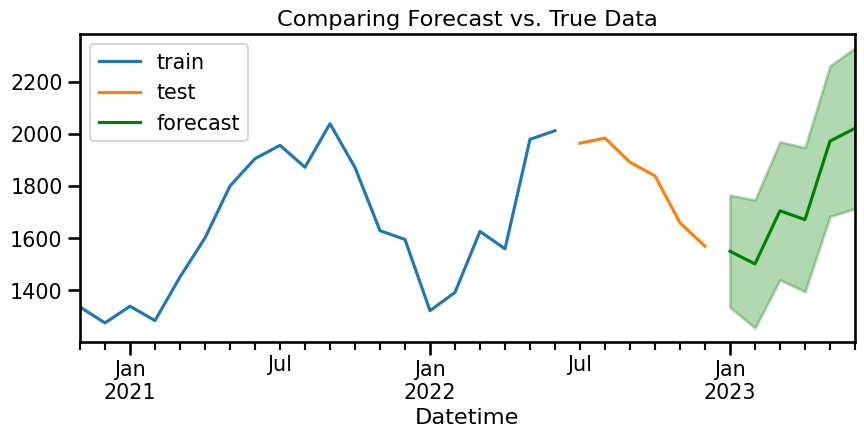

In [118]:
# Ger forecast into true future (fit on entrie time series)
forecast_df = final_model.get_forecast(len(test)).summary_frame()

plot_forecast(train, test, forecast_df, n_train_lags = 20);

In [127]:
chicago_ts

Primary Type,ASSAULT,THEFT
Datetime,,
2001-01-31,2123.0,7867.0
2001-02-28,2029.0,6669.0
2001-03-31,2824.0,7766.0
2001-04-30,2746.0,7702.0
2001-05-31,2903.0,8420.0
...,...,...
2022-08-31,1984.0,5244.0
2022-09-30,1891.0,5117.0
2022-10-31,1839.0,5242.0


In [128]:
THEFT_ts=chicago_ts['THEFT']

In [129]:
THEFT_ts.isna().sum()

0

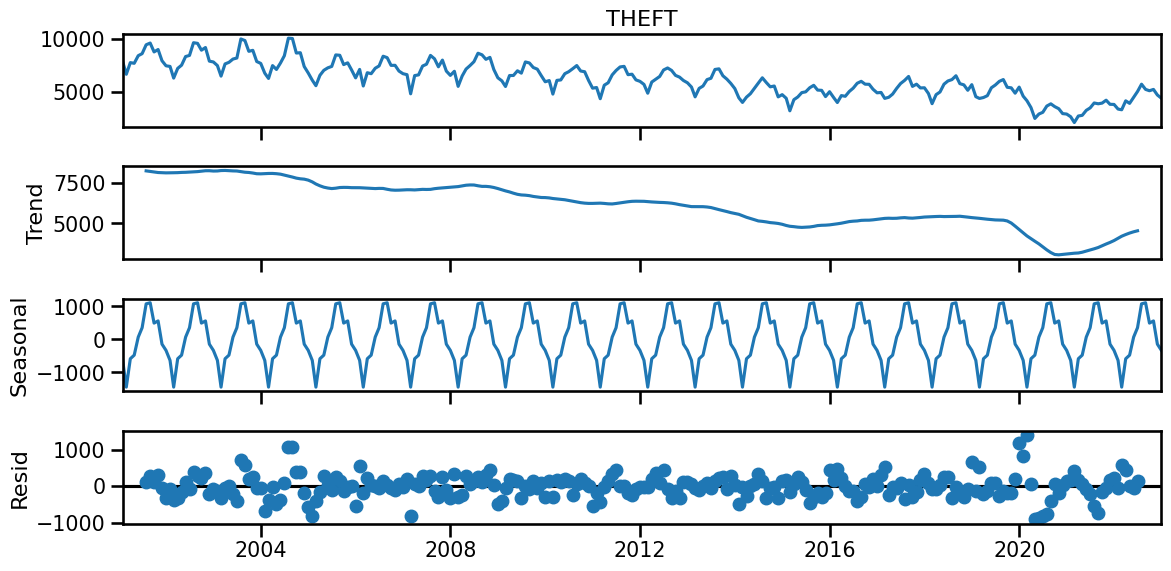

In [130]:
# We see a repeating pattern that is likely seasonal
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(THEFT_ts)
fig = decomp.plot()
fig.set_size_inches(12,6)
fig.tight_layout()

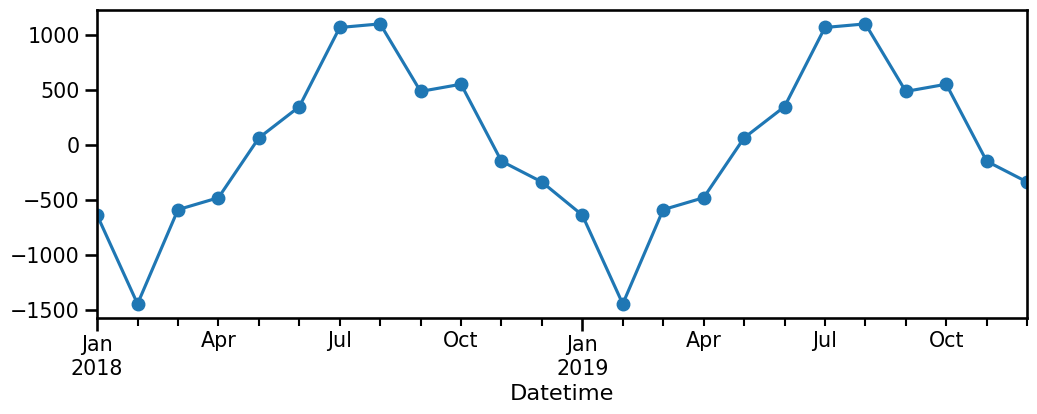

In [131]:
seasonal = decomp.seasonal
ax = seasonal.loc['2018': '2019'].plot(marker = 'o')

In [132]:
ndiffs(THEFT_ts)

1

In [133]:
nsdiffs(THEFT_ts,m=12)

0

In [134]:
get_adfuller_results(THEFT_ts.diff().dropna())

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-3.953728,12,250,0.001673,0.05,True


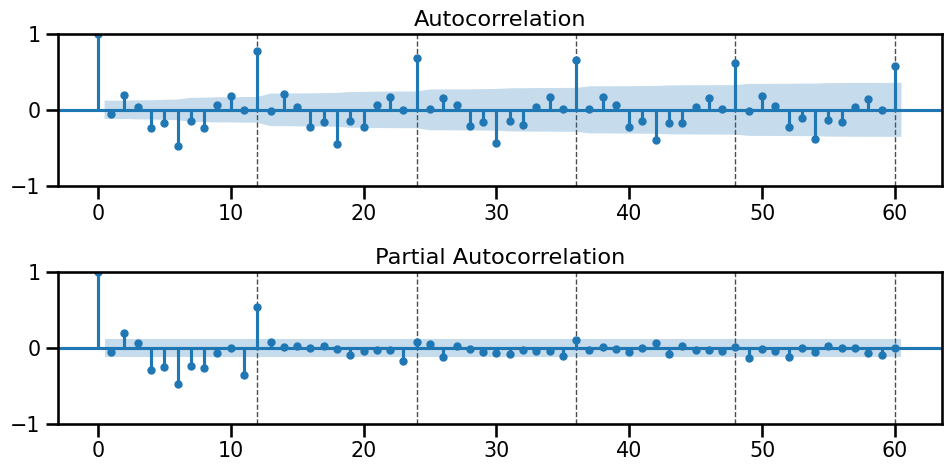

In [135]:
plot_acf_pacf(THEFT_ts.diff().dropna(), annotate_seas=True, m = 12,nlags=60);


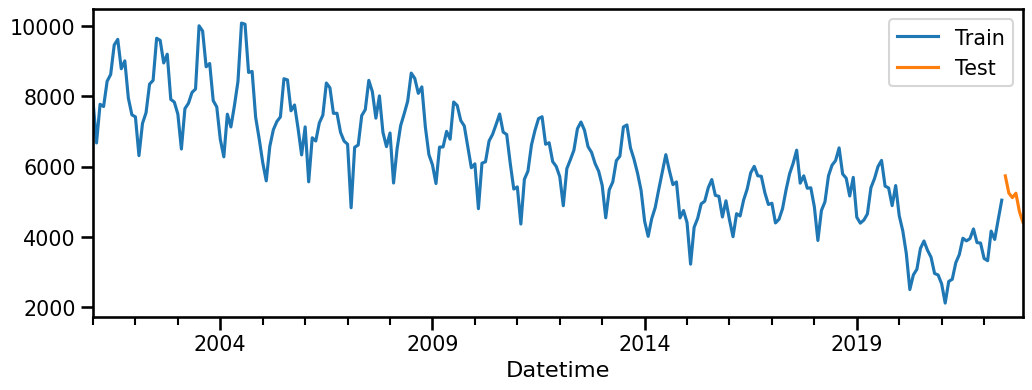

In [136]:
# tts so test size is 24 lags
test_lags =6
train, test = train_test_split(THEFT_ts, test_size= test_lags)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [143]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1 # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1 # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima_train = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [144]:
# Obtain summary
sarima_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            THEFT   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1874.405
Date:                          Mon, 11 Dec 2023   AIC                           3758.809
Time:                                  13:34:53   BIC                           3776.555
Sample:                              01-31-2001   HQIC                          3765.946
                                   - 06-30-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.937      1.066      0.287      -0.838       2.836
ma.L1         -0.9989      0.963     -1.037      0.300      -2.887       0.889
ar.S.L12       0.9716      0.009    112.276      0.000       0.955       0.989
ma.S.L12      -0.6677      0.044    -15.005      0.000      -0.755      -0.580
sigma2      1.123e+05   7947.969     14.128      0.000    9.67e+04    1.28e+05
===================================================================================
Ljung-Box (L1) (Q):                  10.97   Jarque-Bera (JB):                12.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.26
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

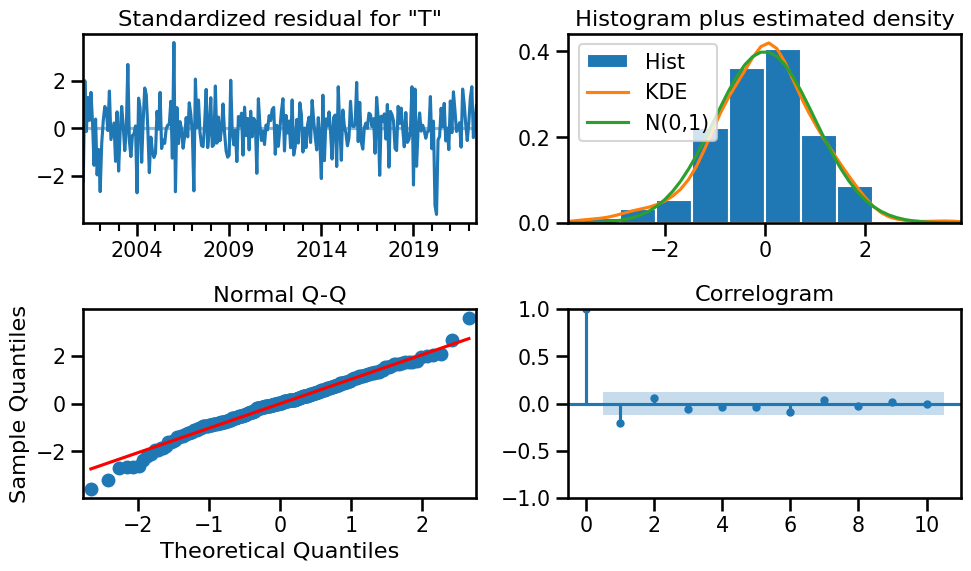

In [148]:
# Obtain diagnostic plots
fig = sarima_train.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 235.031
- MSE = 83,078.458
- RMSE = 288.233
- R^2 = 0.529
- MAPE = 4.78%


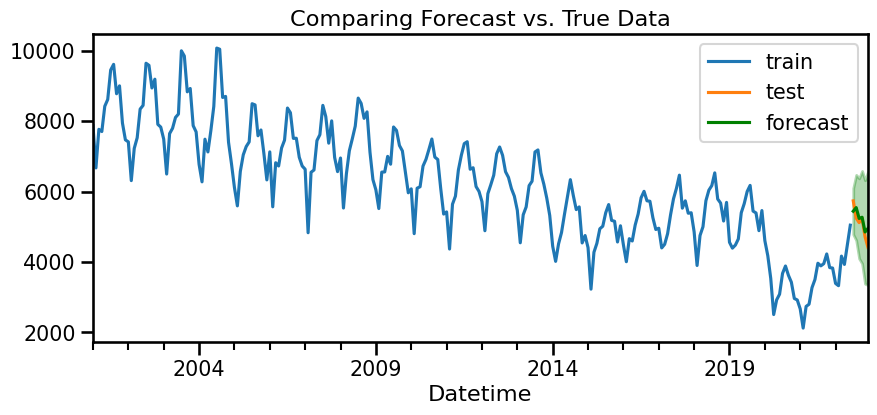

In [149]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima_train.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

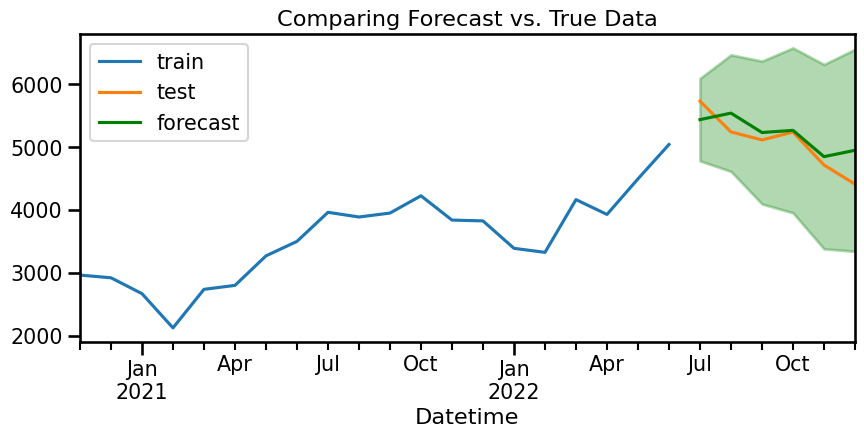

In [150]:
# Ger forecast into true future (fit on entrie time series)
forecast_df = sarima_train.get_forecast(len(test)).summary_frame()

plot_forecast(train, test, forecast_df, n_train_lags = 20);

In [151]:
import pmdarima as pm
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=7.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4050.524, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3791.710, Time=0.99 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3914.631, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4048.603, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4050.805, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3774.214, Time=2.15 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3743.853, Time=6.69 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3743.960, Time=1.64 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3742.900, Time=3.28 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3870.719, Time=1.33 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3913.736, Time=0.44 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3754.859, Time=3.81 sec
 ARIMA(2,1,0)(1,0,2)[12] inter

In [152]:
# Try auto_arima orders
sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Obtain summary
sarima.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                 THEFT   No. Observations:                  258
Model:             ARIMA(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.634
Date:                               Mon, 11 Dec 2023   AIC                           3741.268
Time:                                       13:41:31   BIC                           3759.013
Sample:                                   01-31-2001   HQIC                          3748.404
                                        - 06-30-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2251      0.046     -4.934      0.000      -0.315      -0.136
ar.S.L12       0.9778      0.008    120.049      0.000       0.962       0.994
ma.S.L12      -0.5771      0.059     -9.814      0.000      -0.692      -0.462
ma.S.L24      -0.1202      0.068     -1.758      0.079      -0.254       0.014
sigma2      1.038e+05   7353.367     14.120      0.000    8.94e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                30.54
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.44
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 211.160
- MSE = 72,805.923
- RMSE = 269.826
- R^2 = 0.587
- MAPE = 4.27%


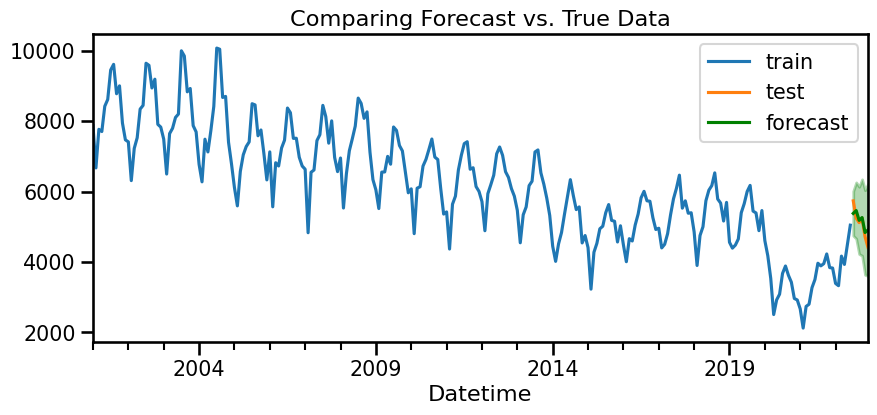

In [153]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Datetime'>)

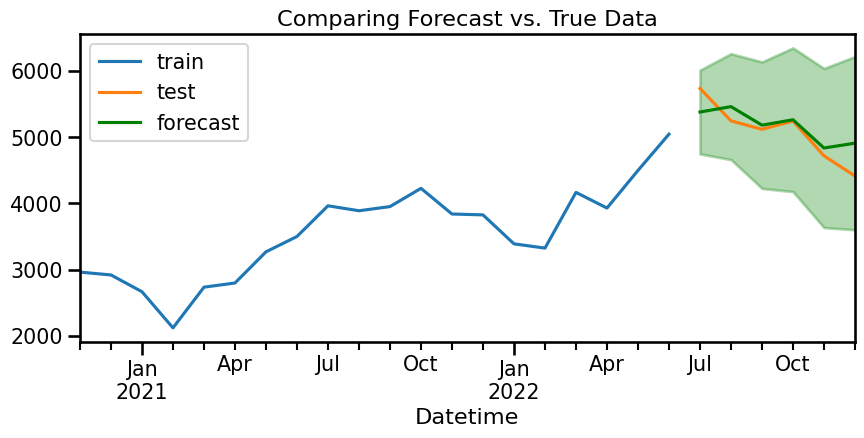

In [154]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df, n_train_lags = 20)

In [156]:
final_p = 1
final_q = 0
final_d = 1
final_P = 1
final_Q = 2
final_D = 0
final_model= tsa.ARIMA(
    THEFT_ts,
    order=(final_p, final_d, final_q),
    seasonal_order=(final_P, final_D, final_Q, m),
).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


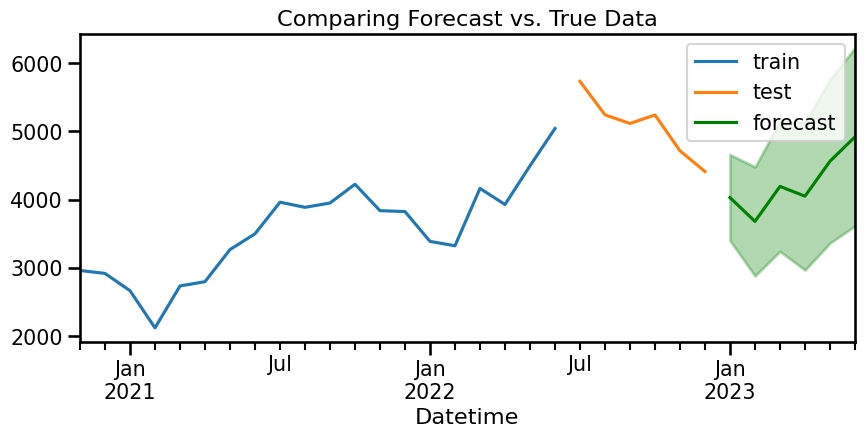

In [157]:
# Ger forecast into true future (fit on entrie time series)
forecast_df = final_model.get_forecast(len(test)).summary_frame()

plot_forecast(train, test, forecast_df, n_train_lags = 20);

In [1]:
# Define starting and final values
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The change in X over the forecast is {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')

NameError: ignored